In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    23,887,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,981,249 (91.48 MB)

 Trainable params: 23,981,249 (91.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = image.ImageDataGenerator(rescale= 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale= 1./255)

In [13]:
!unzip -q "Covid Dataset.zip" -d ./dataset_files

In [14]:
train_generator = train_datagen.flow_from_directory(
    'dataset_files/CovidDataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

val_generator = test_datagen.flow_from_directory(
    'dataset_files/CovidDataset/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [15]:
hist=model.fit(train_generator, epochs=6, validation_data=val_generator, validation_steps=2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 96s 14s/step - accuracy: 0.5719 - loss: 8.8496 - val_accuracy: 0.5000 - val_loss: 0.6844
Epoch 2/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.4600 - loss: 0.7330 - val_accuracy: 0.5000 - val_loss: 0.6522
Epoch 3/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.6944 - loss: 0.5695 - val_accuracy: 0.9000 - val_loss: 0.4434
Epoch 4/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.7562 - loss: 0.4241 - val_accuracy: 0.9333 - val_loss: 0.3074
Epoch 5/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.8207 - loss: 0.3858 - val_accuracy: 0.9500 - val_loss: 0.2066
Epoch 6/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.8522 - loss: 0.2945 - val_accuracy: 0.9500 - val_loss: 0.1950


In [16]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


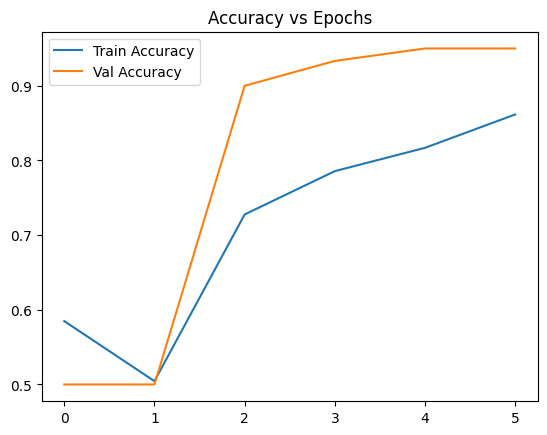

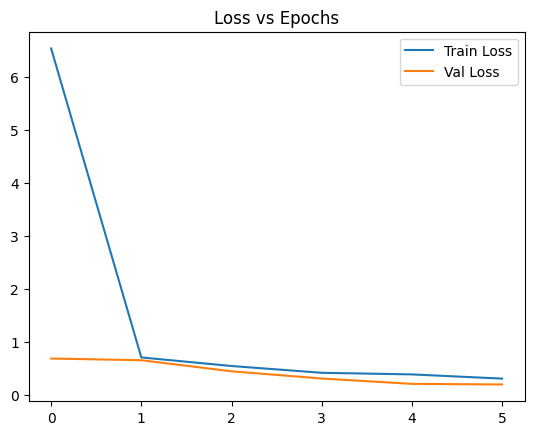

In [17]:
import matplotlib.pyplot as plt

# 1. Extract the data
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# 2. Plot Accuracy
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

# 3. Plot Loss
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [18]:
model.save('covid_model.keras')

In [19]:
hist.history['accuracy']

[0.5848214030265808,
 0.5044642686843872,
 0.7276785969734192,
 0.7857142686843872,
 0.8169642686843872,
 0.8616071343421936]

In [20]:
hist.history['val_accuracy']

[0.5,
 0.5,
 0.8999999761581421,
 0.9333333373069763,
 0.949999988079071,
 0.949999988079071]